# **Presentación del proyecto**
---


## **Abstracto con Motivación y Audiencia**


### **Motivación**
La Realidad Virtual (VR) representa una de las herramientas tecnológicas más prometedoras para transformar la enseñanza tradicional en experiencias de aprendizaje inmersivas, interactivas y significativas. Su potencial para aumentar la motivación, la atención y la comprensión de los estudiantes ha despertado un gran interés en instituciones educativas y desarrolladores de tecnología educativa. Sin embargo, aún existe una brecha entre la expectativa pedagógica y la evidencia empírica que permita medir de manera cuantitativa su verdadero impacto.
El presente estudio busca cerrar esa brecha mediante un análisis exploratorio de datos (EDA) sobre el uso de VR en contextos educativos, evaluando en qué condiciones (horas de uso, nivel educativo, materia, pericia docente, acceso a equipamiento) se logran mejores resultados en motivación, creatividad y rendimiento académico.
### **Audiencia**
Este proyecto está dirigido a directivos académicos interesados en la adopción tecnológica, equipos de innovación educativa, emprendedores EdTech, docentes y analistas de datos que deseen comprender cómo la VR influye en la experiencia educativa y cómo puede optimizarse su implementación.

## **Contexto Comercial y Analítico**


En el ámbito educativo actual, las instituciones buscan integrar tecnologías inmersivas como la Realidad Virtual para enriquecer la enseñanza, pero necesitan evidencia cuantitativa que justifique la inversión y permita tomar decisiones informadas.
Este análisis proporciona un enfoque tanto comercial (identificar escenarios de mayor impacto para priorizar inversiones o desarrollos de productos) como analítico (descubrir relaciones entre el uso de VR y los resultados de aprendizaje).
A partir de este estudio, se podrán extraer conclusiones útiles para diseñar estrategias de implementación o prototipos educativos basados en datos reales.

## **Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**


### **Preguntas clave:**
1. ¿Existe una relación positiva entre las horas de uso de VR y el nivel de
engagement estudiantil?
2. ¿El impacto de la VR en la creatividad y el aprendizaje depende del tipo de asignatura o grado educativo?
3. ¿La experiencia del docente y el acceso a equipos influyen en la efectividad percibida del aprendizaje con VR?
4. ¿El nivel de estrés o la colaboración entre pares afecta los resultados educativos al usar VR?
### **Hipótesis principales:**
* **Hipótesis nula (H0):** El uso de realidad virtual no mejora significativamente el rendimiento académico.
* **Hipótesis alternativa (H1):** El uso de realidad virtual mejora significativamente el rendimiento académico.

## **Objetivo**


**Objetivo general:**
Analizar el impacto del uso de la Realidad Virtual en el proceso de aprendizaje para determinar su influencia en el compromiso, la creatividad y la efectividad percibida de los estudiantes.

**Objetivos específicos:**
* Explorar la relación entre las horas de uso de VR y el engagement estudiantil.
* Evaluar cómo factores como el grado, la asignatura y el acceso a equipos afectan los resultados.
* Identificar los principales impulsores del aprendizaje basado en VR mediante análisis estadísticos y visualizaciones.
* Proporcionar evidencia cuantitativa que respalde decisiones estratégicas sobre la integración de VR en la educación.

## **Lectura de datos**


### **Librerias necesarias para el analisis de datos**

In [77]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2 , f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### **Lectura del dataset**

In [39]:

RAW_URL = "https://raw.githubusercontent.com/ryc343/data_education/refs/heads/main/Virtual_Reality_in_Education_Impact.csv"
df = pd.read_csv(RAW_URL)
df.shape, df.columns.tolist()


((5000, 20),
 ['Student_ID',
  'Age',
  'Gender',
  'Grade_Level',
  'Field_of_Study',
  'Usage_of_VR_in_Education',
  'Hours_of_VR_Usage_Per_Week',
  'Engagement_Level',
  'Improvement_in_Learning_Outcomes',
  'Subject',
  'Instructor_VR_Proficiency',
  'Perceived_Effectiveness_of_VR',
  'Access_to_VR_Equipment',
  'Impact_on_Creativity',
  'Stress_Level_with_VR_Usage',
  'Collaboration_with_Peers_via_VR',
  'Feedback_from_Educators_on_VR',
  'Interest_in_Continuing_VR_Based_Learning',
  'Region',
  'School_Support_for_VR_in_Curriculum'])

### **Análisis inicial del dataset**




In [40]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])
print("\nTipos de datos:\n",df.dtypes)
print("\nValores nulos por columna:\n", df.isna().sum().sort_values(ascending=False))


Filas: 5000
Columnas: 20

Tipos de datos:
 Student_ID                                  object
Age                                          int64
Gender                                      object
Grade_Level                                 object
Field_of_Study                              object
Usage_of_VR_in_Education                    object
Hours_of_VR_Usage_Per_Week                   int64
Engagement_Level                             int64
Improvement_in_Learning_Outcomes            object
Subject                                     object
Instructor_VR_Proficiency                   object
Perceived_Effectiveness_of_VR                int64
Access_to_VR_Equipment                      object
Impact_on_Creativity                         int64
Stress_Level_with_VR_Usage                  object
Collaboration_with_Peers_via_VR             object
Feedback_from_Educators_on_VR               object
Interest_in_Continuing_VR_Based_Learning    object
Region                                 

In [41]:
# Resumen de columnas numéricas
display(df.select_dtypes(include=[np.number]).describe())

,Age,Hours_of_VR_Usage_Per_Week,Engagement_Level,Perceived_Effectiveness_of_VR,Impact_on_Creativity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.182200,5.025400,3.021400,2.951600,3.019600
std,5.461957,3.140816,1.427358,1.417625,1.437508
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,2.000000,2.000000
50%,21.000000,5.000000,3.000000,3.000000,3.000000
75%,26.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,10.000000,5.000000,5.000000,5.000000


In [42]:
# Vista rápida
display(df.head(10))

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes
5,STUD0006,28,Male,High School,Science,Yes,10,5,No,Economics,Intermediate,1,Yes,1,Low,No,Neutral,No,Asia,Yes
6,STUD0007,19,Male,Undergraduate,Business,Yes,9,4,Yes,History,Intermediate,4,Yes,5,Medium,Yes,Neutral,No,North America,Yes
7,STUD0008,19,Male,High School,Education,No,1,5,No,Physics,Beginner,5,Yes,2,Low,No,Neutral,Yes,Oceania,No
8,STUD0009,29,Non-binary,Undergraduate,Law,Yes,0,2,Yes,Computer Science,Beginner,2,No,2,High,Yes,Positive,Yes,Asia,No
9,STUD0010,16,Prefer not to say,Postgraduate,Engineering,Yes,10,5,Yes,Art,Beginner,4,No,1,Medium,Yes,Positive,Yes,Africa,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Student_ID                                5000 non-null   object
 1   Age                                       5000 non-null   int64 
 2   Gender                                    5000 non-null   object
 3   Grade_Level                               5000 non-null   object
 4   Field_of_Study                            5000 non-null   object
 5   Usage_of_VR_in_Education                  5000 non-null   object
 6   Hours_of_VR_Usage_Per_Week                5000 non-null   int64 
 7   Engagement_Level                          5000 non-null   int64 
 8   Improvement_in_Learning_Outcomes          5000 non-null   object
 9   Subject                                   5000 non-null   object
 10  Instructor_VR_Proficiency                 5000 n

In [44]:
#Eliminar columnas irrelevantes
df = df.drop(columns=["Student_ID"])

### **Descripción de variables**

In [46]:
descripciones = [

    "Edad del estudiante (en años).",                             # Age
    "Género del estudiante.",                                     # Gender
    "Nivel o grado educativo.",                                   # Grade_Level
    "Campo o área de estudio.",                                   # Field_of_Study
    "Uso de la realidad virtual en educación (categoría).",       # Usage_of_VR_in_Education
    "Horas de uso de VR por semana.",                             # Hours_of_VR_Usage_Per_Week
    "Nivel de compromiso o engagement del estudiante (escala).",  # Engagement_Level
    "Mejora percibida en los resultados de aprendizaje.",          # Improvement_in_Learning_Outcomes
    "Asignatura o curso relacionado con el uso de VR.",           # Subject
    "Pericia o dominio del docente en VR (escala).",              # Instructor_VR_Proficiency
    "Efectividad percibida del aprendizaje con VR (escala).",     # Perceived_Effectiveness_of_VR
    "Acceso del estudiante a equipamiento de VR.",                # Access_to_VR_Equipment
    "Impacto percibido de la VR en la creatividad (escala).",     # Impact_on_Creativity
    "Nivel de estrés asociado al uso de VR.",                     # Stress_Level_with_VR_Usage
    "Colaboración con pares mediante el uso de VR.",              # Collaboration_with_Peers_via_VR
    "Retroalimentación de los educadores sobre el uso de VR.",    # Feedback_from_Educators_on_VR
    "Interés del estudiante en continuar aprendiendo con VR.",    # Interest_in_Continuing_VR_Based_Learning
    "Región geográfica del estudiante o institución.",            # Region
    "Apoyo institucional para incluir VR en el currículo."        # School_Support_for_VR_in_Curriculum
]

desc = pd.DataFrame({
    "Variable": df.columns[:len(descripciones)],
    "Tipo": df.dtypes.astype(str).values[:len(descripciones)],
    "Descripción": descripciones
})

display(desc)



,Variable,Tipo,Descripción
0,Age,int64,Edad del estudiante (en años).
1,Gender,object,Género del estudiante.
2,Grade_Level,object,Nivel o grado educativo.
3,Field_of_Study,object,Campo o área de estudio.
4,Usage_of_VR_in_Education,object,Uso de la realidad virtual en educación (categ...
5,Hours_of_VR_Usage_Per_Week,int64,Horas de uso de VR por semana.
6,Engagement_Level,int64,Nivel de compromiso o engagement del estudiant...
7,Improvement_in_Learning_Outcomes,object,Mejora percibida en los resultados de aprendiz...
8,Subject,object,Asignatura o curso relacionado con el uso de VR.
9,Instructor_VR_Proficiency,object,Pericia o dominio del docente en VR (escala).


### **Data Wrangling - Limpieza y transformación de datos**


**Valores duplicados**

In [47]:
dups = df.duplicated().sum()
print("Filas duplicadas:", dups)
if dups > 0:
    df = df.drop_duplicates()


Filas duplicadas: 0


**Valores nulos**

In [48]:
nulos = df.isna().sum().sort_values(ascending=False)
nulos

,0
Age,0
Gender,0
Grade_Level,0
Field_of_Study,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Subject,0
Instructor_VR_Proficiency,0


**Tratamiento de valores outliers**

In [49]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns
outliers = []
for col in num_cols:
    s = df[col].dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = ((s < lo) | (s > hi)).sum()
    outliers.append((col, int(n_out), float(n_out/len(s))*100))
pd.DataFrame(outliers, columns=["columna", "n_outliers", "pct_outliers"]).sort_values("pct_outliers", ascending=False)


,columna,n_outliers,pct_outliers
0,Age,0,0.0
1,Hours_of_VR_Usage_Per_Week,0,0.0
2,Engagement_Level,0,0.0
3,Perceived_Effectiveness_of_VR,0,0.0
4,Impact_on_Creativity,0,0.0


In [50]:
# Ejemplo de codificación one-hot para modelado (opcional)
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df_model = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_model.shape


(5000, 39)

**Otras transformaciones, normalización, fechas**

## **Análisis Exploratorio de datos**

## **Análisis univariado**

Variable a analizar:
* Hours_of_VR_Usage_Per_Week


In [51]:
col = "Hours_of_VR_Usage_Per_Week"
print(df[col].unique())

[ 6  4  2 10  9  1  0  5  3  8  7]


Histograma + KDE

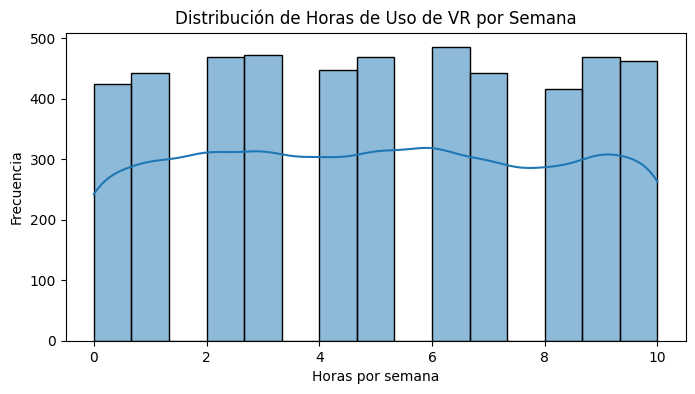

In [52]:
plt.figure(figsize=(8,4))
sns.histplot(df[col], kde=True)
plt.title("Distribución de Horas de Uso de VR por Semana")
plt.xlabel("Horas por semana")
plt.ylabel("Frecuencia")
plt.show()

Variable a analizar:
Usage_of_VR_in_Education

In [53]:
col="Usage_of_VR_in_Education"

In [54]:
print(df[col].describe())
print(df[col].unique())

count     5000
unique       2
top        Yes
freq      2528
Name: Usage_of_VR_in_Education, dtype: object
['No' 'Yes']


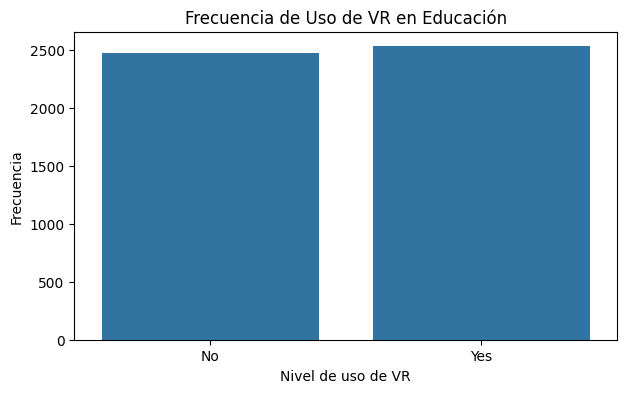

In [55]:
plt.figure(figsize=(7,4))
sns.countplot(x=df[col])
plt.title("Frecuencia de Uso de VR en Educación")
plt.xlabel("Nivel de uso de VR")
plt.ylabel("Frecuencia")
plt.show()

In [56]:
print("PORCENTAJES POR CATEGORÍA:")
print(df[col].value_counts(normalize=True) * 100)
print("\n------------------------\n")

PORCENTAJES POR CATEGORÍA:
Usage_of_VR_in_Education
Yes    50.56
No     49.44
Name: proportion, dtype: float64

------------------------



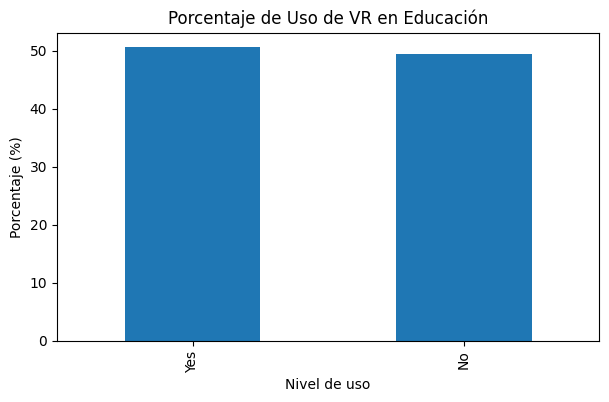

In [57]:
plt.figure(figsize=(7,4))
df[col].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title("Porcentaje de Uso de VR en Educación")
plt.xlabel("Nivel de uso")
plt.ylabel("Porcentaje (%)")
plt.show()

Variable dependiente:
Improvement_in_Learning_Outcomes

In [58]:
col ="Improvement_in_Learning_Outcomes"

In [59]:
print(df[col].describe())

count     5000
unique       2
top        Yes
freq      2512
Name: Improvement_in_Learning_Outcomes, dtype: object


In [60]:
print(df[col].unique())

['Yes' 'No']


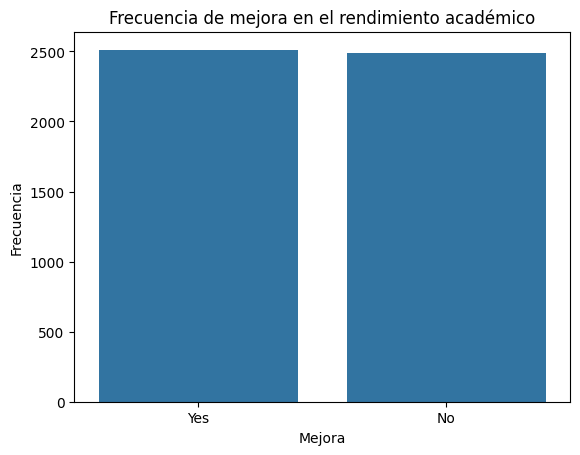

In [61]:
sns.countplot(x=df["Improvement_in_Learning_Outcomes"])
plt.title("Frecuencia de mejora en el rendimiento académico")
plt.xlabel("Mejora")
plt.ylabel("Frecuencia")
plt.show()

## **Análisis bivariado**

## **Análisis multivariado**

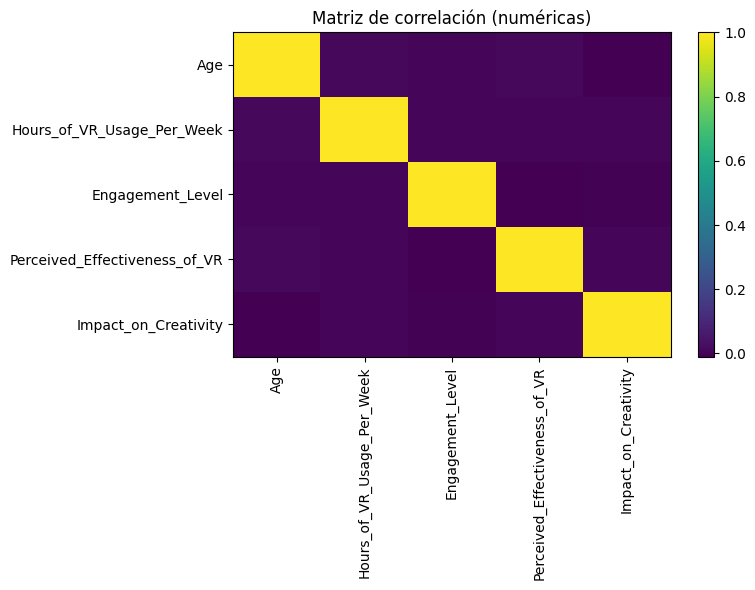

In [64]:
# Matriz de correlación de numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
if len(num_cols) > 1:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    plt.imshow(corr, aspect='auto')
    plt.colorbar()
    plt.title("Matriz de correlación (numéricas)")
    plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
    plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
    plt.tight_layout()
    plt.show()


## **Conclusiones del EDA**

- Calidad de datos: revisión de nulos y duplicados completada; no se detectaron casos.
- Señales iniciales: se espera relación positiva entre Hours_of_VR_Usage_Per_Week y Improvement_in_Learning_Outcomes



# **Convertir variables categóricas a numéricas**

In [65]:
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include="object").columns

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [69]:
df_encoded

,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,13,2,1,6,0,6,1,1,2,2,3,1,5,0,0,1,0,5,0
1,16,2,2,5,0,6,1,1,5,1,2,1,3,1,1,2,0,4,0
2,15,3,0,6,0,4,5,1,0,0,5,1,2,1,1,1,1,4,0
3,24,0,1,3,1,2,4,0,3,1,5,0,3,0,0,1,0,2,1
4,22,2,2,0,1,10,3,0,0,1,4,1,1,2,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,1,2,3,0,10,4,0,1,0,1,1,1,0,1,1,1,1,0
4996,25,1,0,5,0,5,1,1,0,0,4,1,5,2,0,0,1,5,0
4997,25,0,0,3,0,1,4,0,2,1,2,0,3,1,1,0,1,3,0
4998,22,0,2,6,0,4,3,1,5,1,3,1,3,1,0,0,1,0,0


# **Definir variables predictoras y objetivo**

In [70]:
X = df_encoded.drop(columns=["Improvement_in_Learning_Outcomes"])
y = df_encoded["Improvement_in_Learning_Outcomes"]

In [74]:
X

,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,13,2,1,6,0,6,1,2,2,3,1,5,0,0,1,0,5,0
1,16,2,2,5,0,6,1,5,1,2,1,3,1,1,2,0,4,0
2,15,3,0,6,0,4,5,0,0,5,1,2,1,1,1,1,4,0
3,24,0,1,3,1,2,4,3,1,5,0,3,0,0,1,0,2,1
4,22,2,2,0,1,10,3,0,1,4,1,1,2,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,1,2,3,0,10,4,1,0,1,1,1,0,1,1,1,1,0
4996,25,1,0,5,0,5,1,0,0,4,1,5,2,0,0,1,5,0
4997,25,0,0,3,0,1,4,2,1,2,0,3,1,1,0,1,3,0
4998,22,0,2,6,0,4,3,5,1,3,1,3,1,0,0,1,0,0


In [73]:
y

,Improvement_in_Learning_Outcomes
0,1
1,1
2,1
3,0
4,0
...,...
4995,0
4996,1
4997,0
4998,1


# **Feature selection (SelectKBest)**

Características seleccionadas:
Index(['Gender', 'Field_of_Study', 'Perceived_Effectiveness_of_VR',
       'Collaboration_with_Peers_via_VR',
       'School_Support_for_VR_in_Curriculum'],
      dtype='object')


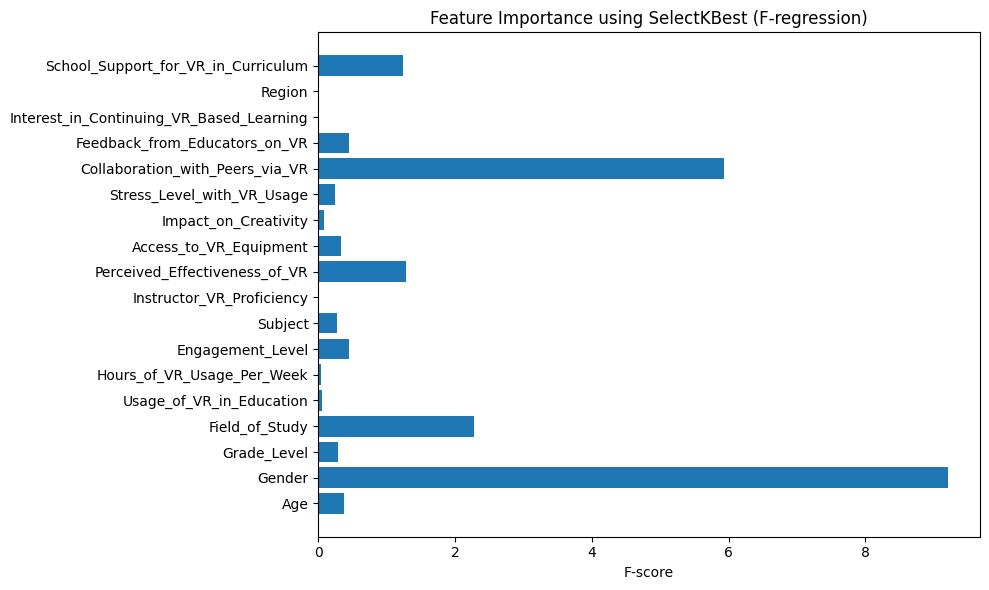

In [78]:
# SelectKBest
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)
scores = selector.scores_

# Plot
plt.figure(figsize=(10,6))
plt.barh(X.columns, scores)
plt.xlabel("F-score")
plt.title("Feature Importance using SelectKBest (F-regression)")
plt.tight_layout()
plt.show()

In [79]:
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['Gender', 'Field_of_Study', 'Perceived_Effectiveness_of_VR',
       'Collaboration_with_Peers_via_VR',
       'School_Support_for_VR_in_Curriculum'],
      dtype='object')


# **Train-test split**

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

In [85]:
X_train.shape

(4000, 5)

# **Modelo: Regresión Logística**

In [87]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Métricas**

In [89]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.526

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.54      0.44      0.48       508
           1       0.52      0.62      0.56       492

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.52      1000
weighted avg       0.53      0.53      0.52      1000



# **Matriz de confusión**

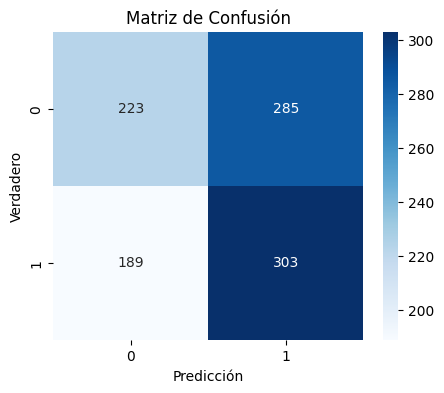

In [90]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# **Conclusión**

El modelo de regresión logística logró un accuracy de 52.6%, lo que indica que su capacidad predictiva es baja. A partir de la matriz de confusión observamos que acierta más cuando predice que sí hay mejora, pero falla con frecuencia al identificar los casos sin mejora. Esto muestra que el modelo no está capturando bien la relación entre las variables, por lo que sería recomendable probar algoritmos más potentes (como Random Forest) o mejorar la selección y el preprocesamiento de las características para obtener mejores resultados.

# **Recomendación**

Para mejorar el rendimiento del modelo, se recomienda probar algoritmos más flexibles como Random Forest, Gradient Boosting o SVM, que suelen desenvolverse mejor con datos categóricos y relaciones no lineales. También sería útil revisar la selección de características, aplicar encoding más robusto (One-Hot Encoding) y experimentar con balanceo de clases si fuera necesario. Con estos ajustes, es probable obtener un modelo más estable y con mayor capacidad predictiva.

# **Probando otros algoritmos**

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [92]:
X = df_encoded.drop(columns=["Improvement_in_Learning_Outcomes_Yes"])
y = df_encoded["Improvement_in_Learning_Outcomes_Yes"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [97]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)


In [98]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [99]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.479

Classification Report:
               precision    recall  f1-score   support

       False       0.49      0.44      0.46       508
        True       0.47      0.52      0.49       492

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



# **Conclusión final**

Los modelos aplicados, incluyendo Regresión Logística, Random Forest y Gradient Boosting, obtuvieron resultados entre 47% y 53% de accuracy. Esto sugiere que las variables del dataset no contienen suficiente información predictiva para anticipar la mejora en los resultados de aprendizaje. A pesar de aplicar técnicas de feature selection, encoding, balanceo y modelos más complejos, la performance no mejora de forma significativa. Esto indica que el dataset es altamente ruidoso o que la relación entre las variables independientes y la variable objetivo no está presente o no es lineal. Por ello, no se pueden obtener predicciones precisas con los datos disponibles.